<a href="https://colab.research.google.com/github/imji0319/PDSH/blob/master/credit_cardPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
cd /content/gdrive/My Drive/data

/content/gdrive/My Drive/data


In [18]:
ls

credit_card.xls


In [20]:
import pandas as pd

df = pd.read_excel('credit_card.xls', sheet_name='Data', header=1)
print(df.shape)
df.head(3)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


### 신용카드 데이터 세트는 30,000개의 레코드와 24개의 속성을 가짐.

target : 'default payment next month'
- 다음달 연체 여부로 '연체' = 1, '정상납부' = 0


In [0]:
df.rename( columns = { "PAY_0" : "PAY_1" , "default payment next month" : "default" } , inplace = True )
y_target = df[ 'default' ]
X_feature = df.drop('default', axis = 1 )

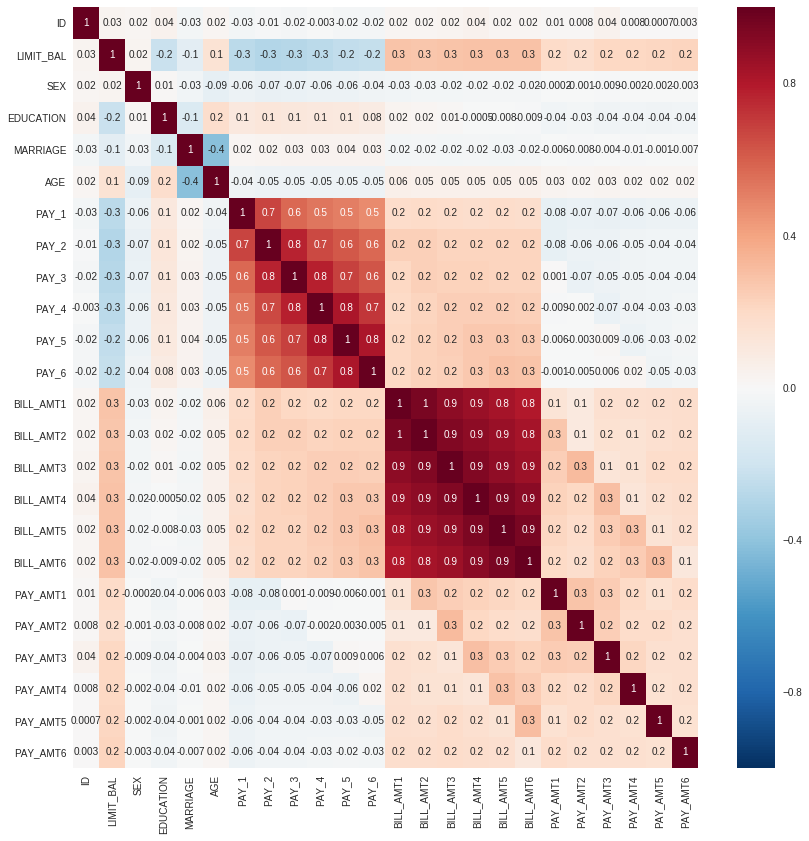

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_feature.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot = True, fmt = '.1g')

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~BILL_AMT6까지 6개의 속성명 생성

cols_bill = [ 'BILL_AMT'+str(i) for i in range(1, 7) ]
print('대상 속성명: ' , cols_bill)

#2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출 
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_feature[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성 : ', pca.explained_variance_ratio_ )

대상 속성명:  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성 :  [0.90555253 0.0509867 ]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators = 300, random_state = 156)
scores = cross_val_score( rcf, X_feature, y_target, scoring = 'accuracy', cv=3)

print('cv=3 인 경우의 개별 Fold세트별 정확도 : ' , scores )
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))


cv=3 인 경우의 개별 Fold세트별 정확도 :  [0.257  0.8209 0.784 ]
평균 정확도 : 0.6206


In [29]:
#원본 데이터에 standardscaler 적용

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_feature)

#6개의 components 을 가진 PCA 변환을 수행하고 cross_val_score로 분류 예측 

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv = 3)

print('cv=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도 : ' , scores )
print('PCA 변환 데이터 세트 평균 정확도 : {0:.4f}'.format(np.mean(scores)))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


cv=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도 :  [0.257  0.8209 0.784 ]
PCA 변환 데이터 세트 평균 정확도 : 0.6206
